#### IMPORT LIBRARIES

In [2]:
# IMPORT REQUIRED LIBRARY
import pandas as pd
from pandas import read_csv
import numpy as np
from matplotlib import pyplot
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR
import matplotlib.pyplot as plt
%matplotlib inline

#pip install git + https://github.com/statsmodels/statsmodels.git

#### IMPORT DATASET & PARSE IT FOR DATE COLUMN

In [3]:
from dateutil.parser import parse

df = pd.read_csv("daily-minimum-temperatures-in-me_.csv", index_col = 'Date', parse_dates = ['Date'])
df.head()

,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [4]:
# Check Data Type
df.dtypes

Daily minimum temperatures in Melbourne, Australia, 1981-1990    float64
dtype: object

#### RENAME COLUMN

It is always a good practise to remove spaces from COLUMN NAMES.

In [5]:
df.rename(columns = {'Daily minimum temperatures in Melbourne, Australia, 1981-1990':'MinTempMelbourne_1981to1990'},
          inplace = True)

In [6]:
df.head()

,MinTempMelbourne_1981to1990
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


#### PLOT DATASET

In [7]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)

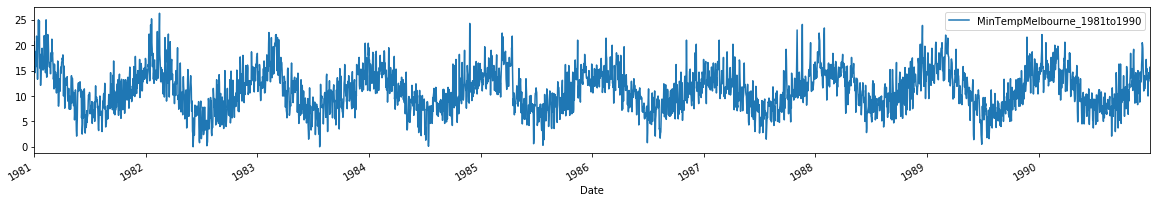

In [8]:
# WHOLE DATASET
df.plot()
plt.show()

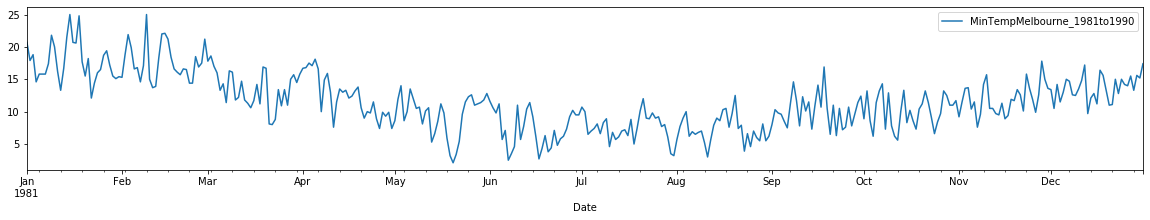

In [9]:
# ONE YEAR DATA
df[:365].plot()
plt.show()

In [49]:
df365 = df[:365]

#### PERFORM << ADFULLER TEST >> WITH << AIC >> AS AUTOLAG

The Akaike information criterion (AIC) is a mathematical method for evaluating how well a model fits the data it was generated from. 

In statistics, AIC is used to compare different possible models and determine which one is the best fit for the data.

AIC is calculated from:

1. the number of independent variables used to build the model.

2. the maximum likelihood estimate of the model (how well the model reproduces the data).

The best-fit model according to AIC is the one that explains the greatest amount of variation using the fewest possible independent variables.

In [10]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['MinTempMelbourne_1981to1990'], autolag = 'AIC')

print("1. ADF: ", dftest[0])
print("2. P-Value: ", dftest[1])
print("3. Num. of Lags: ", dftest[2])
print("4. Num. of Observations used for ADF Regression and Critical Values Calculations: ", dftest[3])
print("5. Critical Values: ", dftest[4])
if dftest[1] > 0.05:
    print('TIME-SERIES is NOT STATIONARY')
else:
    print('TIME-SERIES is STATIONARY')

1. ADF:  -4.444804924611691
2. P-Value:  0.00024708263003610866
3. Num. of Lags:  20
4. Num. of Observations used for ADF Regression and Critical Values Calculations:  3629
5. Critical Values:  {'1%': -3.4321532327220154, '5%': -2.862336767636517, '10%': -2.56719413172842}
TIME-SERIES is STATIONARY


In [11]:
for key, val in dftest[4].items():
    print("\t", key, ": ", val)

	 1% :  -3.4321532327220154
	 5% :  -2.862336767636517
	 10% :  -2.56719413172842


#### CREATE ACF PLOT TO CHECK CORRELATION OF LAGS

ACF PLOT will show us till how many lags(past values) there is a CORRELATION between out Data point in Close Column.

In [12]:
y = df['MinTempMelbourne_1981to1990']

In [13]:
from statsmodels.tsa.stattools import acf, pacf

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


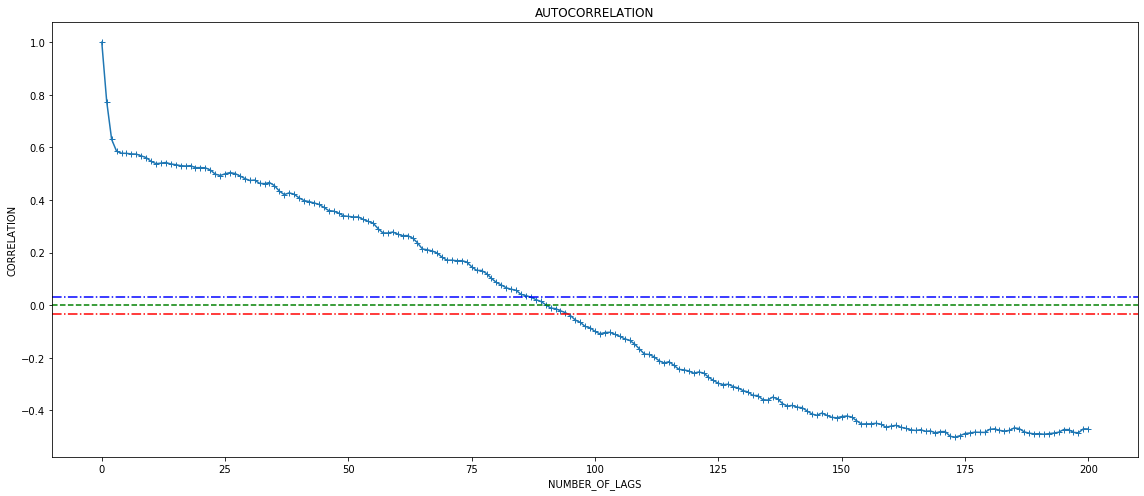

In [14]:
# Calling AUTO CORRELATION FUNCTION
ACF_lag = acf(y, nlags = 200)

plt.figure(figsize = (16, 7))
plt.plot(ACF_lag, marker = '+')
plt.axhline(y = 0, linestyle = '--', color = 'green')
plt.axhline(y = -1.96 / np.sqrt(len(y)), linestyle = '-.', color = 'red')
plt.axhline(y = 1.96 / np.sqrt(len(y)), linestyle = '-.', color = 'blue')
plt.title('AUTOCORRELATION')
plt.xlabel('NUMBER_OF_LAGS')
plt.ylabel('CORRELATION')
plt.tight_layout()

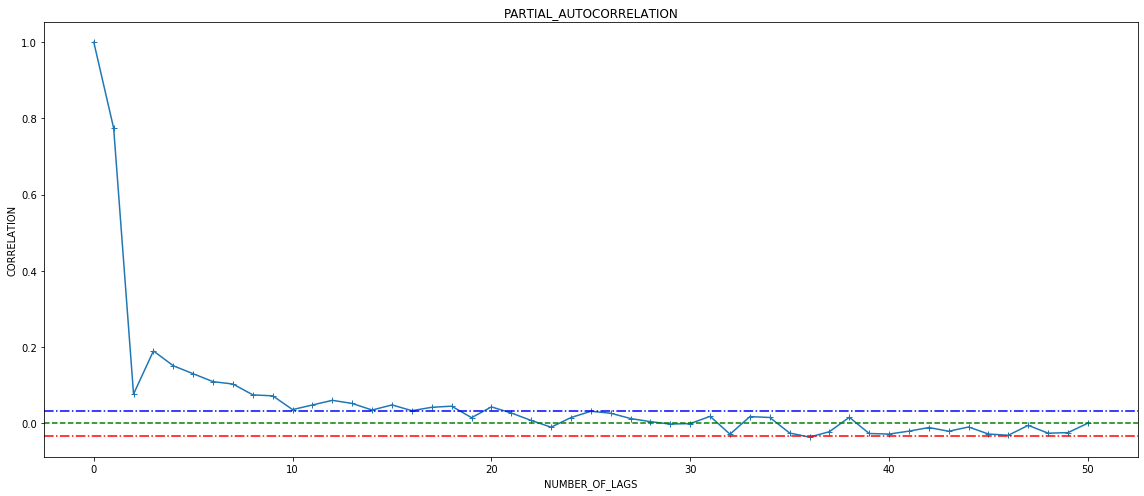

In [15]:
# Calling AUTO CORRELATION FUNCTION
PACF_lag = pacf(y, nlags = 50, method = 'ols')

plt.figure(figsize = (16, 7))
plt.plot(PACF_lag, marker = '+')
plt.axhline(y = 0, linestyle = '--', color = 'green')
plt.axhline(y = -1.96 / np.sqrt(len(y)), linestyle = '-.', color = 'red')
plt.axhline(y = 1.96 / np.sqrt(len(y)), linestyle = '-.', color = 'blue')
plt.title('PARTIAL_AUTOCORRELATION')
plt.xlabel('NUMBER_OF_LAGS')
plt.ylabel('CORRELATION')
plt.tight_layout()

#### PLOT ACF & PACF w/ LAGS = 25

In [16]:
plt.rcParams["figure.figsize"] = (16,4)

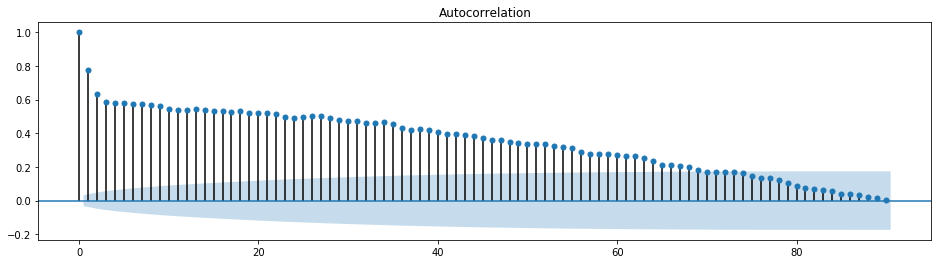

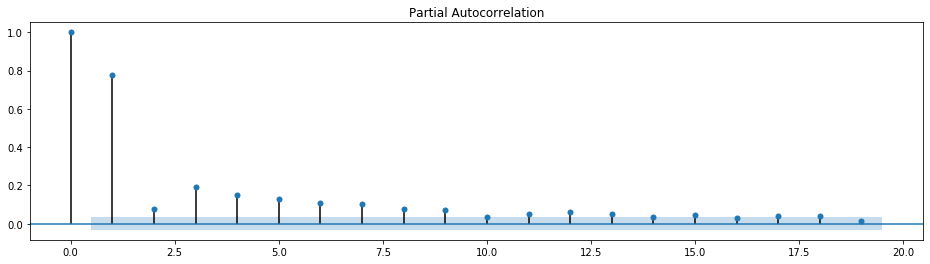

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
acf = plot_acf(df['MinTempMelbourne_1981to1990'], lags = 90)
pacf = plot_pacf(df['MinTempMelbourne_1981to1990'], lags = 19)


#### SPLIT DATASET INTO TRAIN & TEST: Testing: Last 14 Days

In [21]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [39]:
# split dataset
X = df.values
train, test = X[0:len(X)-14], X[len(X)-14:]

#### CREATE AUTO-REGRESSION MODEL

In [40]:
## ====== train autoregression ======== ##
model = AR(train)
model_fit = model.fit()
print('Lag: ', model_fit.k_ar)
print('Coefficients: ', model_fit.params)

Lag:  29
Coefficients:  [ 5.57840064e-01  5.88941383e-01 -9.12821755e-02  4.81768328e-02
  4.03923864e-02  3.94517699e-02  2.62277662e-02  4.50918344e-02
  1.29184242e-02  3.72731445e-02 -5.33199883e-04  3.32042429e-03
  1.85968775e-02  2.54525206e-02  5.19820163e-04  2.42327893e-02
  7.82435905e-03  1.02424211e-02  3.53879110e-02 -8.76330485e-03
  2.37463103e-02  2.00888384e-02  1.09793220e-02 -1.75857035e-02
 -2.61001412e-03  1.70538412e-02  2.10287767e-02  7.16687992e-03
  8.03836321e-03 -2.05208895e-03]


In [41]:
# make predictions
predictions = model_fit.predict(start = len(train), end = len(train) + len(test)-1, dynamic = False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

predicted=13.552958, expected=17.200000
predicted=13.495567, expected=14.700000
predicted=13.602554, expected=15.400000
predicted=13.737459, expected=13.100000
predicted=13.614704, expected=13.200000
predicted=13.660473, expected=13.900000
predicted=13.852037, expected=10.000000
predicted=13.942235, expected=12.900000
predicted=13.819608, expected=14.600000
predicted=13.775308, expected=14.000000
predicted=13.534224, expected=13.600000
predicted=13.446314, expected=13.500000
predicted=13.497585, expected=15.700000
predicted=13.510634, expected=13.000000


Test MSE: 2.880


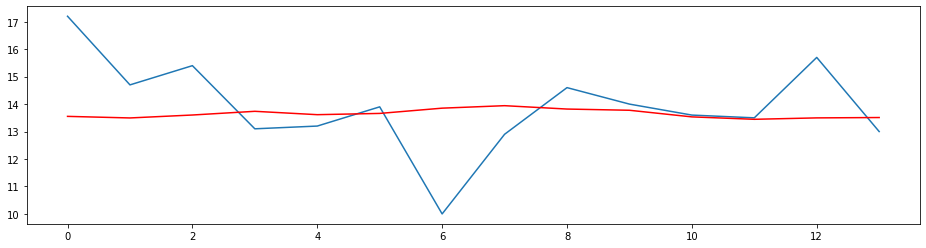

In [42]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()